In [37]:
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
D  = 26.0
nPx = 961
gs = ceo.Source("R",zenith=[0,0,0],rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])

In [39]:
gmt = ceo.GMT_MX(D,nPx)

In [40]:
gmt.reset()
gmt.M1.motion_CS.euler_angles[:,0] = ceo.constants.ARCSEC2RAD
gmt.M1.motion_CS.update()

In [41]:
a = np.array([1],dtype=int32,ndmin=1)
a = np.arange(1,8,dtype=int32)
gmt.M1.keep(a)
#gmt.M2.remove(a)
gs.reset()
gmt.propagate(gs)

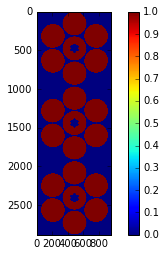

In [42]:
imshow(gs.amplitude.host())
colorbar()

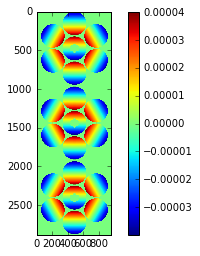

In [43]:
imshow(gs.phase.host())
colorbar()

In [44]:
tid = ceo.StopWatch()
tid.tic()
sxy = gs.wavefront.gradientAverage(1,D)
tid.toc()
print tid.elapsedTime*1e-3

1.83774230957


In [45]:
sxy.host(units='arcsec')

array([[  2.56105155e-01],
       [  1.36375289e-09],
       [  2.56105155e-01],
       [  1.36375289e-09],
       [  2.56105155e-01],
       [  1.36375289e-09]], dtype=float32)

In [46]:
tid.tic()
sxy = np.zeros((2*gs.N_SRC,7))
for a in range(1,8):
    gmt.M1.keep(np.array(a,dtype=int32,ndmin=1))
    #gmt.M2.remove(a)
    gs.reset()
    gmt.propagate(gs)
    sxy[:,a-1] = gs.wavefront.gradientAverage(1,D).host(units='arcsec').ravel()    
tid.toc()
print tid.elapsedTime*1e-3

17.5659238281


In [47]:
gmt.M1.keep(np.arange(1,8,dtype=int32))
gs.reset()
gmt.propagate(gs)

In [48]:
tid.tic()
sxy1 = gmt.segmentsWavefrontGradient(gs)
tid.toc()
print tid.elapsedTime*1e-3

0.779181091309


In [49]:
print np.array_str(sxy,precision=6,suppress_small=True)

[[ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]
 [ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]
 [ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]]


In [50]:
print np.array_str(sxy1.host(units='arcsec').reshape(2*gs.N_SRC,7),precision=6,suppress_small=True)

[[ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]
 [ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]
 [ 1.989436  0.994717 -0.994724 -1.989365 -0.994724  0.994717  1.985424]
 [ 0.        1.722913  1.722879  0.       -1.72288  -1.72291   0.      ]]
